In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import defaultdict,Counter


stop=set(stopwords.words('english'))
plt.style.use('seaborn')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#read and load data 
data1 = pd.read_excel('C:/Users/user/Documents/DATA SCIENCE PROJECT/data/trynow.xlsx')
#data2 = pd.read_csv('C:/Users/user/Documents/DATA SCIENCE PROJECT/Test.csv')


data1.head()

Comment,Aspect,Polarity;;; Aspect Polarity  True  \
0  end of course project was challenging and fun....      C        P  True   
1  teaches you how to use gdb and debug code effe...      C      NEU  True   
2  wow! i took my first course that was heavy in ...      C        P  True   
3     difficult project but it was worth it,S,NEU;;;      S      NEU  True   
4  "the course requires 100% perfection in order ...      S        N  True   

                             Comment,Aspect,Polarity  \
0  end of course project was challenging and fun....   
1  teaches you how to use gdb and debug code effe...   
2  wow! i took my first course that was heavy in ...   
3        difficult project but it was worth it,S,NEU   
4  these flaws could be overlooked if auditing th...   

                                             Comment  
0  end of course project was challenging and fun....  
1  teaches you how to use gdb and debug code effe...  
2  wow! i took my first course that was heavy in ...  
3              difficult project but it was worth it  
4  these flaws could be overlooked if auditing th...

In [3]:
data1 = data1[['Aspect','Polarity','Comment']]

In [4]:
data1.Polarity.unique()

array(['P', 'NEU', 'N', 'N"', 'P"', 'NEU"'], dtype=object)

In [5]:
data1.Aspect.unique()

array(['C', 'S', 'I', 'ISC', 'SC'], dtype=object)

In [6]:
aspect_mapping = {'P"': 'P' ,'N"':'N' , 'NEU"': 'NEU','P': 'P','NEU':'NEU','N':'N'}

data1['Polarity'] = data1['Polarity'].map(aspect_mapping)

In [7]:
aspect_mapping = {'P': 0 ,'N':1 , 'NEU': 2}

data1['Polarity_label'] = data1['Polarity'].map(aspect_mapping)

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21940 entries, 0 to 21939
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Aspect          21940 non-null  object
 1   Polarity        21940 non-null  object
 2   Comment         21940 non-null  object
 3   Polarity_label  21940 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 685.8+ KB


In [9]:
data1.describe()

Polarity_label
count    21940.000000
mean         0.209936
std          0.519769
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000

In [10]:
data1.isnull().sum()

Aspect            0
Polarity          0
Comment           0
Polarity_label    0
dtype: int64

## Exploratory Data Analysis

### Is our data balanced?

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


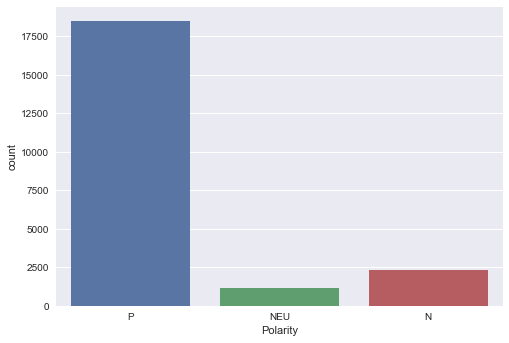

In [12]:
ax = sns.countplot(data1.Polarity)

In [13]:
from plotly import graph_objs as go
temp = data1.groupby('Polarity').count()['Comment'].reset_index().sort_values(by='Comment',ascending=False)

fig = go.Figure(go.Funnelarea(
    text =temp.Polarity,
    values = temp.Comment,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [14]:
data1['Polarity'].value_counts()

P      18478
N       2318
NEU     1144
Name: Polarity, dtype: int64

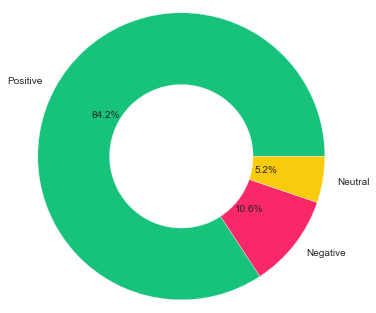

In [15]:
class_df = data1.groupby('Polarity').count()['Comment'].reset_index().sort_values(by='Comment',ascending=False)
percent_class=class_df.Comment

labels= ['Positive','Negative','Neutral']

colors = ['#17C37B','#F92969','#FACA0C']

my_pie,_,_ = plt.pie(percent_class,radius = 1.2,labels=labels,colors=colors,autopct="%.1f%%")

plt.setp(my_pie, width=0.6, edgecolor='white') 

plt.show()

**There is a very large uneven distribution in the data with the largest belong to positive followed by negative and neutral**

### 2. Number of characters in review

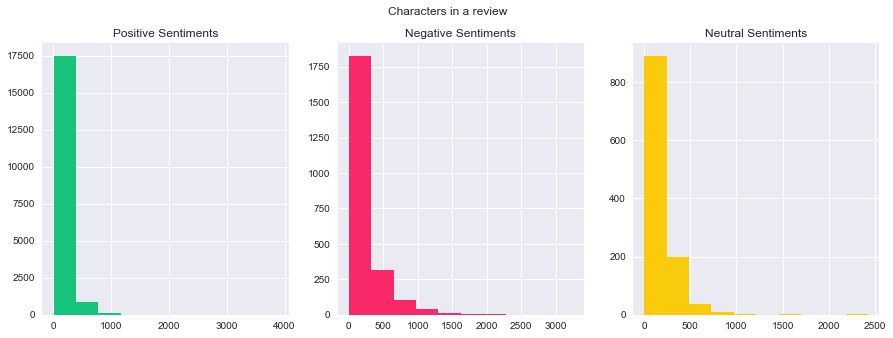

In [16]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

tweet_len=data1[data1['Polarity']=="P"]['Comment'].str.len()
ax1.hist(tweet_len,color='#17C37B')
ax1.set_title('Positive Sentiments')

tweet_len=data1[data1['Polarity']=="N"]['Comment'].str.len()
ax2.hist(tweet_len,color='#F92969')
ax2.set_title('Negative Sentiments')

tweet_len=data1[data1['Polarity']=="NEU"]['Comment'].str.len()
ax3.hist(tweet_len,color='#FACA0C')
ax3.set_title('Neutral Sentiments')

fig.suptitle('Characters in a review')
plt.show()


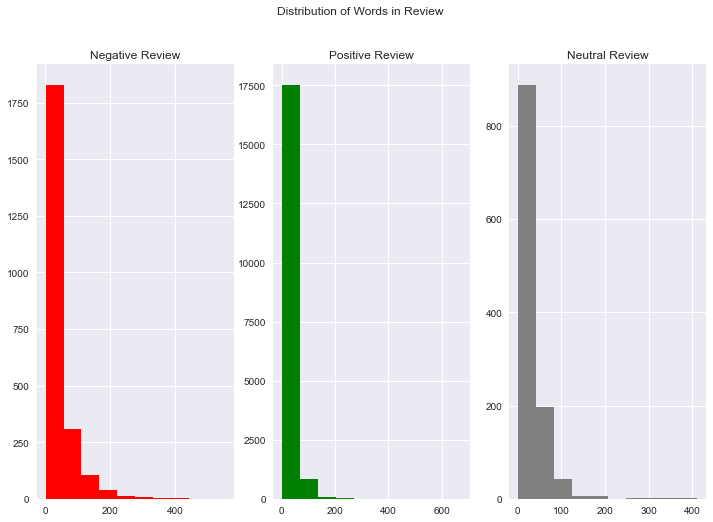

In [17]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(12,8))
text_len=data1[data1['Polarity_label']==1]['Comment'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Negative Review')
text_len=data1[data1['Polarity_label']==0]['Comment'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Positive Review')
text_len=data1[data1['Polarity_label']==2]['Comment'].str.split().map(lambda x: len(x))
ax3.hist(text_len,color='gray')
ax3.set_title('Neutral Review')
fig.suptitle('Distribution of Words in Review')
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 0.98, 'Average word length in each feedback')

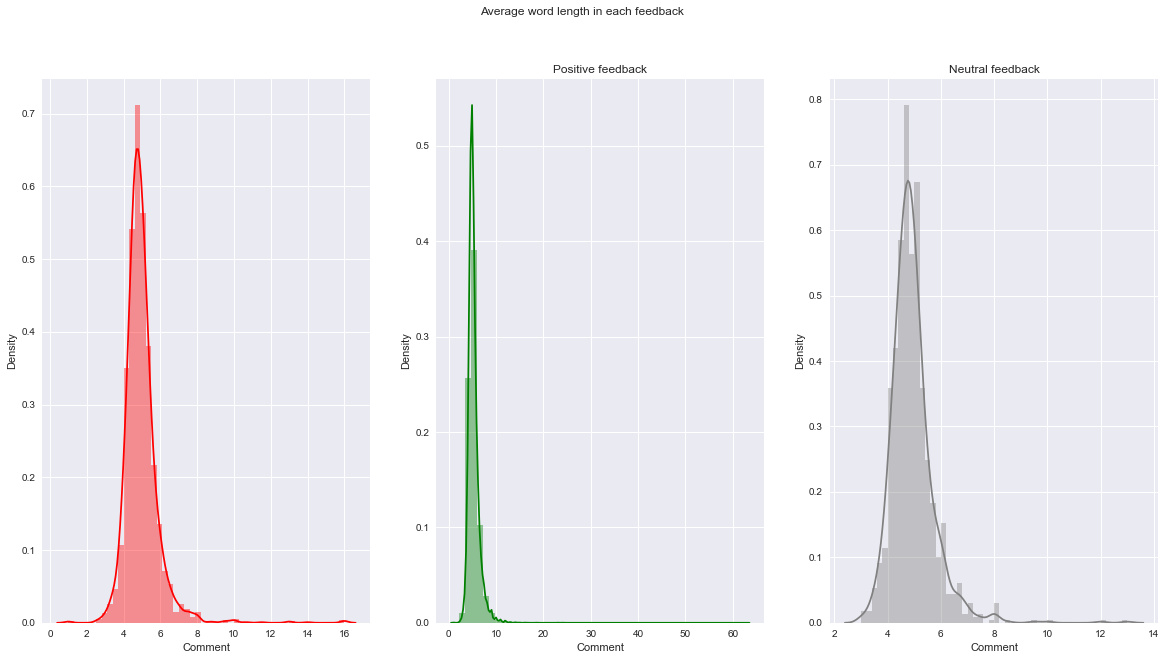

In [18]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,10))
word=data1[data1['Polarity_label']==1]['Comment'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax2.set_title('Negative feedback')
word=data1[data1['Polarity_label']==0]['Comment'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Positive feedback')
word=data1[data1['Polarity_label']==2]['Comment'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax3,color='grey')
ax3.set_title('Neutral feedback')
fig.suptitle('Average word length in each feedback')

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [20]:
import sys
sys.version

'3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]'

<AxesSubplot:>

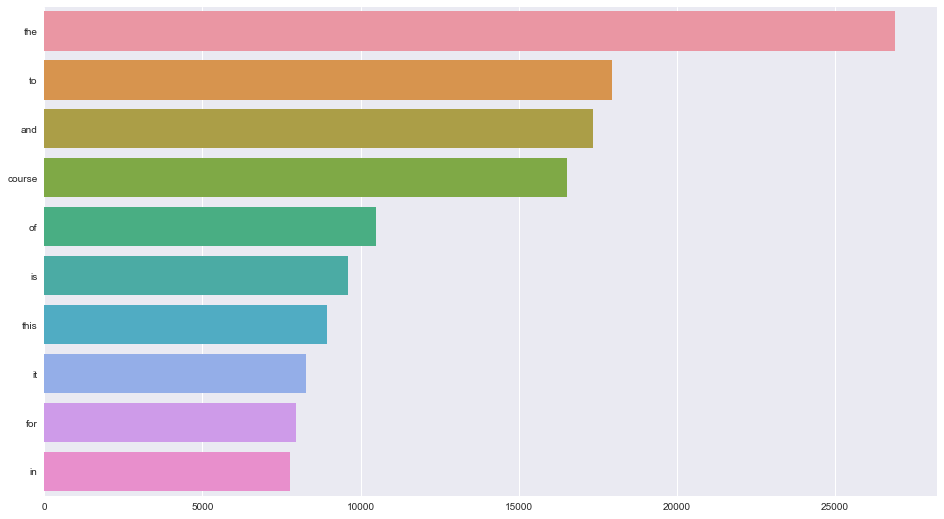

In [23]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(data1.Comment,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

In [29]:
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

### 3. Common stopwords in text

In [34]:
import numpy as np

def create_corpus(target):
    corpus=[]
    
    for x in data1[data1['Polarity']==target ]['Comment'].str.split():
        for i in x: 
            if i  in stop: 
                corpus.append(i)
    return corpus

np.array(stop)

array({'ourselves', 'himself', 'your', 'i', 'under', 'what', 'to', 'before', 'up', 'again', 'that', "it's", "should've", "you're", 'did', 'very', 'didn', 'shan', 'ain', 'each', 'no', "won't", 'been', 'mightn', "don't", 'about', 'yours', 'off', 'when', "isn't", 'if', 'own', 'she', 'further', 'themselves', 'had', "mightn't", "weren't", 'where', 'you', 'myself', 'his', 'after', 'm', "wouldn't", "aren't", 'they', "wasn't", 'or', 'who', 'haven', 'yourselves', 'the', 'ma', "shouldn't", 'on', 'was', 'how', 'than', 'll', 'and', 'more', 'hadn', 'isn', 'which', "she's", 'their', 'yourself', 'mustn', 'herself', 'them', "didn't", 'below', 'is', 'both', 'why', 'such', 'shouldn', 'once', "haven't", 'her', 'because', 'above', 'does', 'for', 't', 'but', "you've", 'being', 'some', "hadn't", 'same', 'down', 'were', 'all', 'y', 'am', 'with', 'we', 'theirs', 're', 'this', 'wasn', 'these', 'doesn', 'weren', 'doing', 'wouldn', "you'd", 'of', 'just', 'won', 'not', 'now', 'most', 'it', 'me', 'then', "couldn't

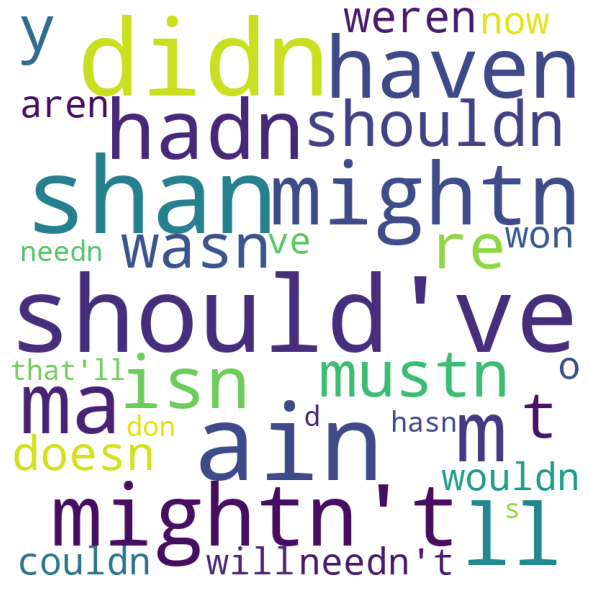

In [35]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  

for val in stop: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = "white") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

<BarContainer object of 10 artists>

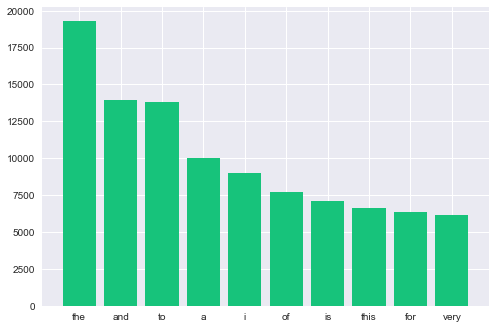

In [36]:
corpus=create_corpus("P")

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1     
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y, color='#17C37B')

<BarContainer object of 10 artists>

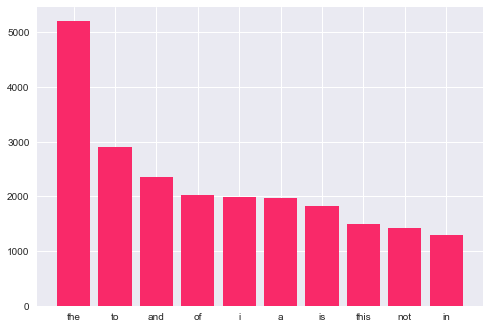

In [37]:
corpus=create_corpus("N")

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
          
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y, color='#F92969')

<BarContainer object of 10 artists>

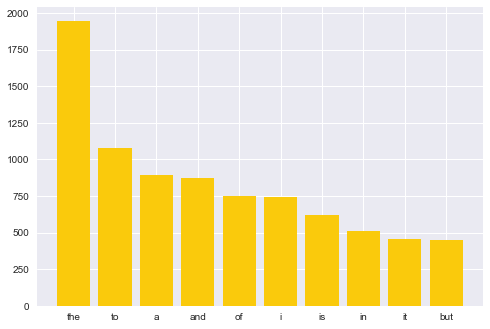

In [38]:
corpus=create_corpus("NEU")

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
               
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y, color='#FACA0C')

### Wordcloud of every polarity

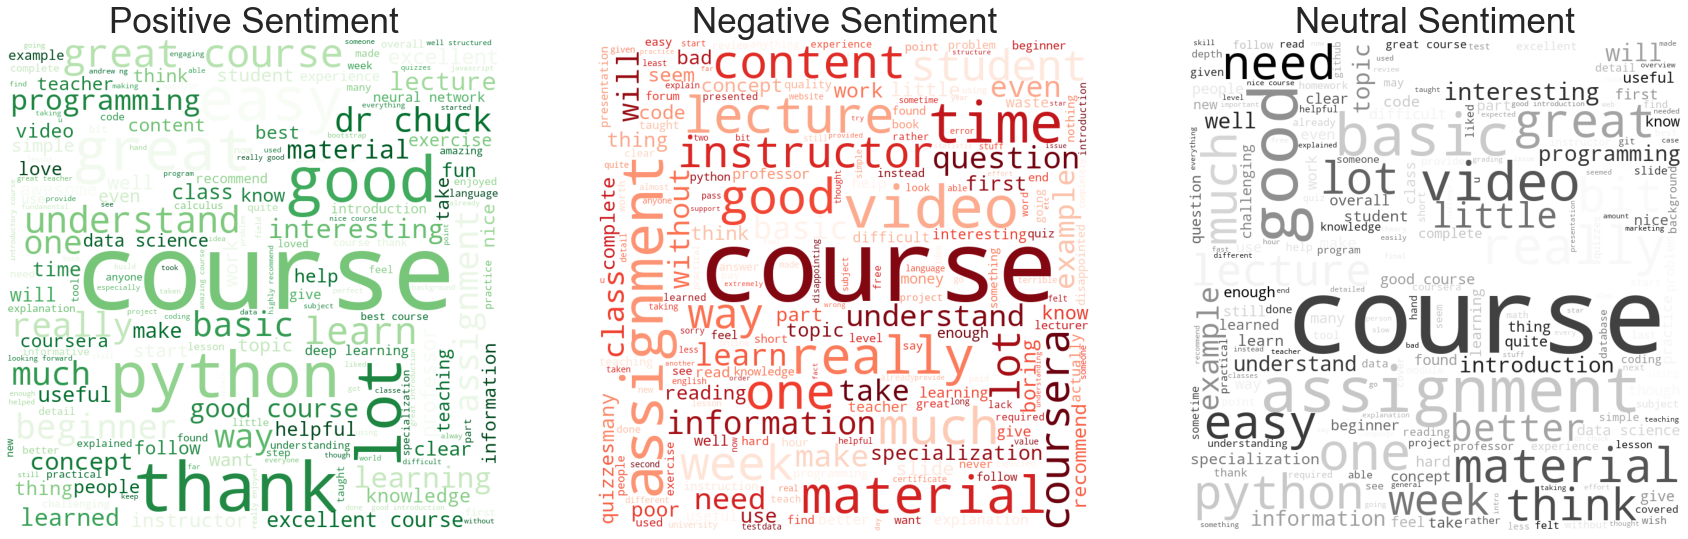

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[30, 15])

df_pos = data1[data1["Polarity"]=="P"]
df_neg = data1[data1["Polarity"]=="N"]
df_neu = data1[data1["Polarity"]=="NEU"]

comment_words = '' 
stopwords = set(STOPWORDS) 

for val in df_pos.Comment: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
   

wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='white',
                colormap="Greens",
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Positive Sentiment',fontsize=35);

comment_words = ''

for val in df_neg.Comment: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "




wordcloud2 = WordCloud(width = 800, height = 800, 
                background_color ='white',
                colormap="Reds",
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)  
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Negative Sentiment',fontsize=35);



comment_words = ''
for val in df_neu.Comment: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

wordcloud3 = WordCloud(width = 800, height = 800, 
                background_color ='white',
                colormap="Greys",
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('Neutral Sentiment',fontsize=35);